In [ ]:

import os
import pandas as pd
from sqlalchemy import create_engine

#Configuration with the Database on PostreSQL

user = "postgres"
password = "root"
host = "localhost"
port = "5432"
database = "Portafolio"
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')

# Route of the file in the hard disk. Use a raw chain r"" (Ignores escape characters using \)
csv_folder = r"C:\Users\diego\OneDrive - Universidad de la Sabana\DATA SCIENCE\Certificación Datacamp"

# Run through all the files and save them as dataframes
for filename in os.listdir(csv_folder):
    if filename.endswith(".csv"):
        table_name = os.path.splitext(filename)[0]  # Table name = File name
        file_path = os.path.join(csv_folder, filename) #Complement the route of the folder with each file
        
        # Read CSV
        df = pd.read_csv(file_path)
        
        # Upload the dataframe to PostgreSQL.
        df.to_sql(table_name, engine, index=False, if_exists='replace')
        print(f"Tabla '{table_name}' succesfully import.")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 413-414: truncated \UXXXXXXXX escape (2769572876.py, line 1)

In [ ]:
#Further data cleaning and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

product_sales=pd.read_csv(r'C:\Users\diego\OneDrive - Universidad de la Sabana\DATA SCIENCE\Certificación Datacamp\product_sales_20250608_190850.csv')
print(product_sales.head())
print(product_sales.info())
print(product_sales.describe())

   week sales_method                           customer_id  nb_sold  revenue  \
0     3        Email  f362d30b-4816-43bc-9361-49ccfd120786        9     92.7   
1     1        Email  7d8d991b-3066-40d7-8ad3-89f83e990d1f        8      NaN   
2     1        Email  06e1f7cf-093d-437d-b441-d14e01446b58        9      NaN   
3     4        Email  3df3cf62-8303-47de-b0cb-8eca9ba2f7d6       11      NaN   
4     4        Email  ae17a221-0690-481f-800a-e15397b80142       11      NaN   

   years_as_customer  nb_site_visits     state  
0                  2              23      Ohio  
1                  3              19     Texas  
2                  1              20   Alabama  
3                  2              27   Montana  
4                  1              26  Nebraska  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week            

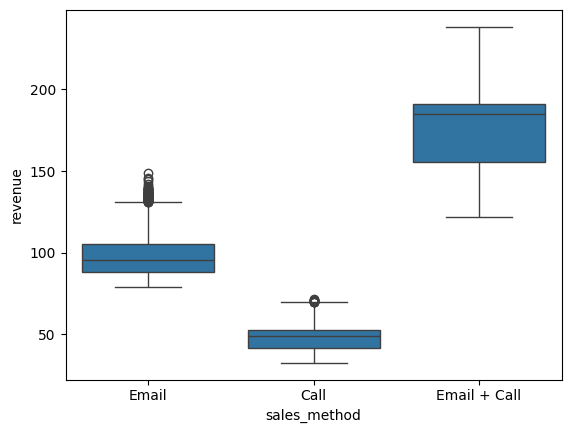

<class 'pandas.core.frame.DataFrame'>
Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB
None
   week sales_method                           customer_id  nb_sold  revenue  \
0     3        Email  f362d30b-4816-43bc-9361-49ccfd120786        9    92.70   
1     1        Email  7d8d991b-3066-40d7-8ad3-89f83e990d1f        8    95.58   
2     1        Email  06e1f7cf-093d-437d-b441-d14e01446b58        9    95.58   
3     4        Email  3df3cf62

In [89]:
#Looking for data distribution across sales_method

sns.boxplot(data=product_sales, x='sales_method',y='revenue')
plt.show()
#Some distributions look kind skewed, so the median per group is better to replace NULLs.
#Create a copy in case I miss something up
product_sales1=product_sales.copy()
#Dictionary with the median of the revenue per each sales method. Key is the sales_method and the value is the median per group
df_dict=product_sales1.groupby('sales_method')['revenue'].median().to_dict()
#Replace NULL values with the value of the dictionary, by mapping the sales method into the keys of df_dict
product_sales1['revenue']=np.round(product_sales1['revenue'].fillna(product_sales1['sales_method'].map(df_dict)),2)

#Removing Outliers from years_as_customer (Cant be more than 41, company was founded in 1984, and today is 2025)
product_sales1 = product_sales1[product_sales1['years_as_customer'] <= 41]

print(product_sales1.info())
print(product_sales1.head())
#Now the database is ready to be used.



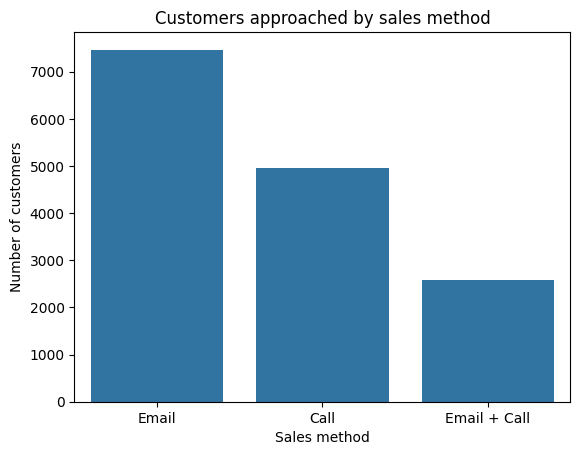

sales_method
Email + Call    2572
Call            4961
Email           7465
Name: count, dtype: int64


In [90]:
#START OF THE EDA

#How many customers were there for each approach?
cust=sns.countplot(data=product_sales1,x='sales_method')
cust.set_title('Customers approached by sales method')
cust.set(xlabel='Sales method', ylabel='Number of customers')
plt.show()

customers=product_sales1.groupby('sales_method')['sales_method'].value_counts().sort_values()
print(customers)
#Email is the method with more customers approach, followed by call and then email+call.

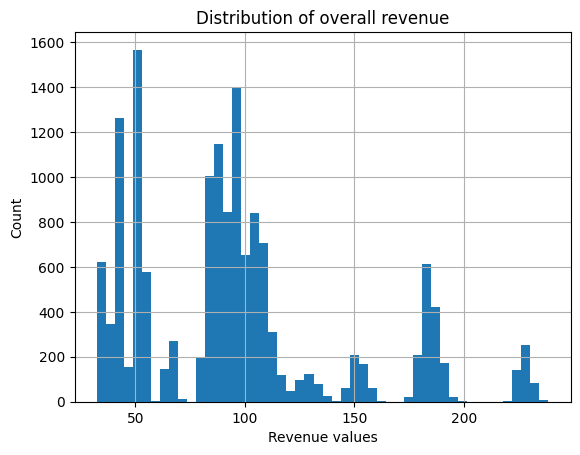

In [91]:
# What does the spread of the revenue look like overall? And for each method

#Spread of revenue:
product_sales1['revenue'].hist(bins=50)
plt.title('Distribution of overall revenue')
plt.xlabel('Revenue values')
plt.ylabel('Count')
plt.show()
#The most common revenue is around $ 40 and $ 100. The distribution of the revenue is not normal, as it is multimodal with many peaks. 
#The distribution is right skewed, there are few clients that leave much revenue on the business.
#Each peak may reflect different product segments, with variable prices (For example, the cheaper ones may be pens, and the expensive monitors, for example)


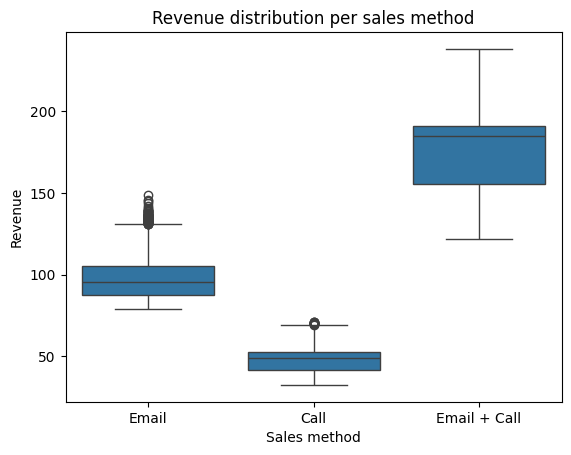

sales_method
Call             49.07
Email            95.58
Email + Call    184.74
Name: revenue, dtype: float64


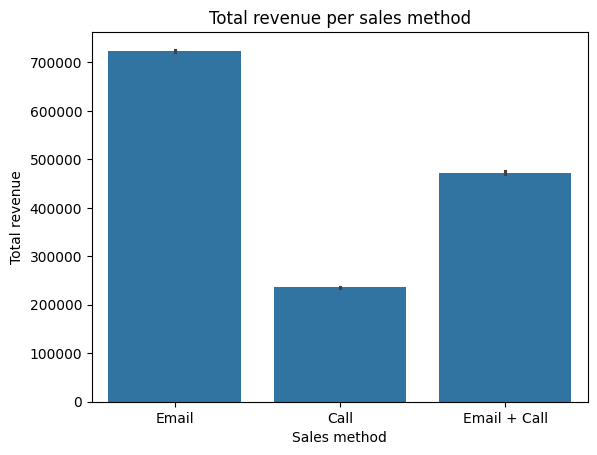

sales_method
Call            236394.69
Email           724216.13
Email + Call    472730.95
Name: revenue, dtype: float64
Email / Email + call revenue difference is 65.27484412698735 %
Email / Email + call customer difference is 34.454119223040856 %


C:\Users\diego\AppData\Local\Temp\ipykernel_30872\2248781826.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  email_emailcall_revdif=totalrevenue.iloc[2]/totalrevenue[1]*100


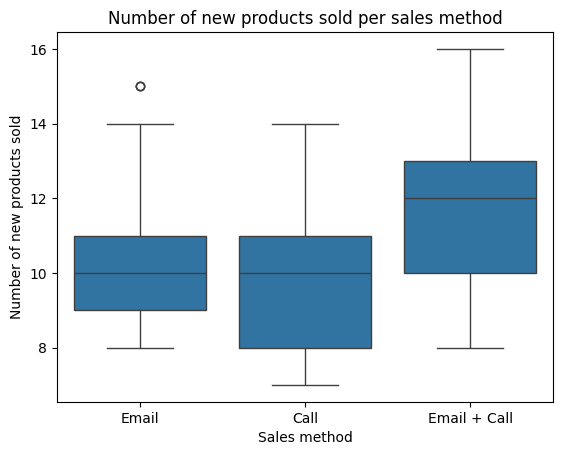

In [92]:
#Spread of revenue per sales method
salesrev=sns.boxplot(data=product_sales, x='sales_method',y='revenue')
salesrev.set_title('Revenue distribution per sales method')
salesrev.set(xlabel='Sales method', ylabel='Revenue')
plt.show()

medianrevenue=product_sales1.groupby('sales_method')['revenue'].median()
print(medianrevenue)

#Total revenue per sales method
totalsalesrev=sns.barplot(data=product_sales1,x='sales_method',y='revenue',estimator='sum')
totalsalesrev.set_title('Total revenue per sales method')
totalsalesrev.set(xlabel='Sales method', ylabel='Total revenue')
plt.show()

totalrevenue=product_sales1.groupby('sales_method')['revenue'].sum()
print(totalrevenue)

email_emailcall_revdif=totalrevenue.iloc[2]/totalrevenue[1]*100
email_emailcall_custdif=customers.iloc[0]/customers.iloc[2]*100
print(f'Email / Email + call revenue difference is {email_emailcall_revdif} %')
print(f'Email / Email + call customer difference is {email_emailcall_custdif} %')


#Median products sold per sales method
salesnb=sns.boxplot(data=product_sales, x='sales_method',y='nb_sold')
salesnb.set_title('Number of new products sold per sales method')
salesnb.set(xlabel='Sales method', ylabel='Number of new products sold')
plt.show()


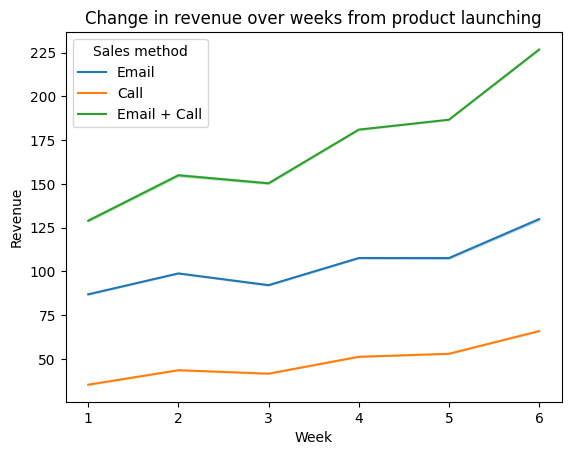

week          percent_change
sales_method                
Call               86.985524
Email              49.482044
Email + Call       75.922119
week          absolute_change
sales_method                 
Call                   30.645
Email                  42.990
Email + Call           97.875


In [93]:
#Difference on time for each method

timerev=sns.lineplot(data=product_sales1,x='week',y='revenue',hue='sales_method',estimator='median')
timerev.set_title('Change in revenue over weeks from product launching')
timerev.set(xlabel='Week',ylabel='Revenue')
plt.legend(title='Sales method')
plt.show()

medianrevenue=product_sales1.groupby(['sales_method','week'])['revenue'].median()
pivot = medianrevenue.unstack('week') 
#Pivot the week column to columns
pivot['percent_change'] = ((pivot[6] - pivot[1]) / pivot[1]) * 100
pivot['absolute_change'] = pivot[6] - pivot[1]

print(pivot[['percent_change']])
print(pivot[['absolute_change']])

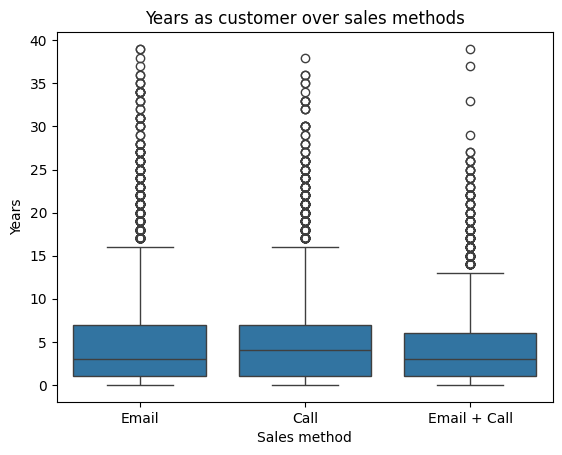

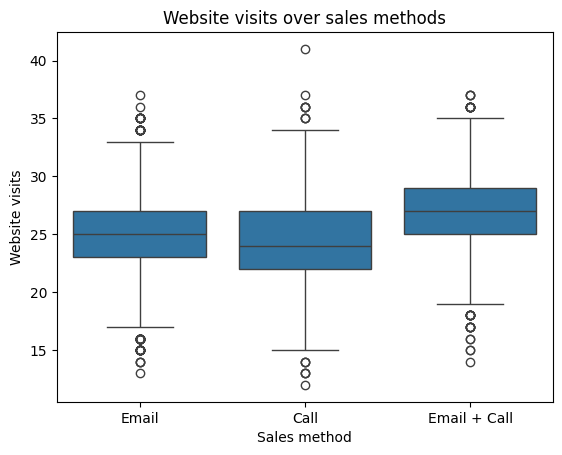

C:\Users\diego\AppData\Local\Temp\ipykernel_30872\186667828.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


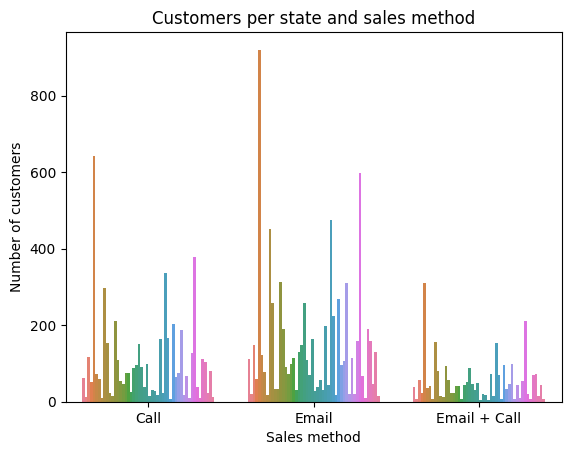

In [94]:
#Difference in customers per each group
#Difference of years as customer
years_as_cust=sns.boxplot(data=product_sales1,x='sales_method',y='years_as_customer')
years_as_cust.set_title('Years as customer over sales methods')
years_as_cust.set(ylabel='Years',xlabel='Sales method')
plt.show()
#There is no significant difference between the years as customer between groups. They are all pretty similar so possible biases are discarded

#Difference on visits to our website in the last 6th months. A group with more overall visits may indicate that the customers are active.
visits=sns.boxplot(data=product_sales1,x='sales_method',y='nb_site_visits')
visits.set_title('Website visits over sales methods')
visits.set(ylabel='Website visits',xlabel='Sales method')
plt.show()
#Pretty similar overall, no significant differences between groups. The median of clients look pretty active.

#Customers per state and sales method
clientes_df = product_sales1.groupby(['sales_method', 'state'])['customer_id'].nunique().reset_index()
sns.barplot(data=clientes_df,x='sales_method',y='customer_id',hue='state')
plt.xlabel('Sales method')
plt.ylabel('Number of customers')
plt.title('Customers per state and sales method')
plt.tight_layout()
plt.legend().remove()
plt.show()

#The clients are simmilary distributed accross regions for each sale method. It is okay.


In [ ]:
#COMPARING REVENUE POTENTIALS
total_em_rev=totalrevenue.iloc[1]
total_rev=totalrevenue.sum()
total_customers=customers.sum()
print(total_em_rev)
median_emcall=medianrevenue.iloc[2]
print(median_emcall)

equilibrium_emcall_app=total_em_rev/median_emcall
equilibrium_overall_revenue=total_rev/median_emcall
print(f'To reach the same total revenue as Email, Email + Call require a total of {round(equilibrium_emcall_app,2)} customer approaches, which is an increase of {round(equilibrium_emcall_app-customers.iloc[0],2)} approaches')

print(f'To reach the overall total revenue, Email + Call require a total of {round(equilibrium_overall_revenue,2)} customer approaches, which is an increase of {round(equilibrium_overall_revenue-customers.iloc[0],2)} approaches\
      compared to the {total_customers} total actual apporaches')

724313.35
184.74
To reach the same total revenue as Email, Email + Call require a total of 3920.72 customer approaches, which is an increase of 1348.72 approaches
To reach the overall total revenue, Email + Call require a total of 7759.5 customer approaches, which is an increase of 5187.5 approaches      compared to the 15000 total actual apporaches
